# Imports y setup

In [ ]:
import io
from google.colab import files
import pandas as pd
import folium

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['co_properties_final.csv']))
df.head()

In [ ]:
metric = []

for i in range(len(df['price'].tolist())):
  metric.append(df['price'].tolist()[i]/df['surface_total'].tolist()[i]) #Se calcula la metrica principal

for i in range(len(metric)):
  m = metric.count(metric[i])
  if m!=1:
    print(m)
    metric[i] = df['price'].tolist()[i]/df['surface_total'].tolist()[i] + 1 #En caso de que este repetida se le suma 1

2
2
2
2
2
2
2


In [ ]:
class Queue:

    def __init__(self, size: int) -> None:
        self.queue: List[Any] = []
        self.size = size


    def __repr__(self) -> str:
        return str(self.queue)

    def __len__(self) -> int:
        return len(self.queue)

    def add(self, elem: int) -> None:
        if len(self.queue) >= self.size:
            raise ValueError('The Queue is full')

        self.queue.append(elem)

    def is_empty(self) -> bool:
        return len(self.queue) == 0

    def reversed_queue(self):
        if not self.queue:
            raise ValueError('The Queue is empty')

        queue_aux = Queue(len_rr := len(self.queue))
        for _ in range(len_rr):
            val_aux = self.queue.pop()
            queue_aux.add(val_aux)
        self.queue = queue_aux
        del(queue_aux,len_rr)

    def remove(self) -> int:
        if not self.queue:
            raise ValueError('The Queue is empty')

        return self.queue.pop(0)


# Métodos

In [ ]:
def is_numeric(value): # Se utiliza para ver si la comparación en al parte de los filtros se puede hacer con números.
  try:
    float(value)  # Intenta convertir el valor a un número flotante
    return True
  except ValueError:
    return False

class Data:
    def __init__(self, title, department, city, property_type, latitude, longitude, surface_total, surface_covered, bedrooms, bathrooms, operation_type, price): #Creamos la info de cada nodo
        #atributos de cada registro
        self.title = title
        self.department = department
        self.city = city
        self.property_type = property_type
        self.latitude = latitude
        self.longitude = longitude
        self.surface_total = surface_total
        self.surface_covered = surface_covered
        self.bedrooms = bedrooms
        self.bathrooms = bathrooms
        self.operation_type = operation_type
        self.price = price


class NodeAVL:
    def __init__(self, key, data):
        self.height = 1
        self.left = None
        self.right = None
        self.data = data

        while (arbol.search(key) is not None): # Métrica extra
            key = key + 1
            print("repetido")

        self.key = key


class treeAVL:
    def __init__(self):
        self.root = None

    def height(self, node): #altura del arbol
        if node is None:
            return 0
        return node.height

    def update_height(self, node):
        node.height = 1 + max(self.height(node.left), self.height(node.right)) #actualiza el valor de la altura cuando se agrega o elimina un nodo

    def rot_right(self, e):  # Rotaciones
        a = e.left
        x = a.right
        a.right = e
        e.left = x
        self.update_height(e)
        self.update_height(a)
        return a

    def rot_left(self, a):
        e = a.right
        x = e.left
        e.left = a
        a.right = x
        self.update_height(a)
        self.update_height(e)
        return e

    def balance(self, node):
        if node is None:
            return 0
        return self.height(node.left) - self.height(node.right) # Factor de balanceo

    def __add(self, node, key, data): #agregar un nodo
        if node is None:
            return NodeAVL(key, data)
        # busca donde agregarlo
        if key < node.key:
            node.left = self.__add(node.left, key, data)
        else:
            node.right = self.__add(node.right, key, data)

        self.update_height(node) #actualiza la altura

        bal = self.balance(node) #balancea

        # verificaciones de que rotacion usar
        if bal > 1 and key < node.left.key:
            return self.rot_right(node)

        if bal < -1 and key > node.right.key:
            return self.rot_left(node)

        if bal < -1 and key < node.right.key:
            node.right = self.rot_right(node.right)
            return self.rot_left(node)

        if bal > 1 and key > node.left.key:
            node.left = self.rot_left(node.left)
            return self.rot_right(node)

        return node

    def add(self, key, data):
        self.root = self.__add(self.root, key,data)

    def __remove(self, node, key): #Eliminacion
            if node is None:
                return node
            #busca el nodo
            if key < node.key:
                node.left = self.eliminar(node.left, key)
            elif key > node.key:
                node.right = self.eliminar(node.right, key)
            else:
                if node.left is None: #Caso si su unico hijo es el derecho
                    temp = node.right
                    node = None
                    return temp
                elif node.right is None: #Caso si su unico hijo es el izquierdo
                    temp = node.left
                    node = None
                    return temp
                # Caso si tiene dos hijos
                temp = self.max_node(node.right) #usamos el sucesor
                node.key = temp.key
                node.right = self.eliminar(node.right, temp.key)

            self.update_height(node) #actualiza la altura

            bal = self.balance(node) #balancea
            #casos de rotaciones
            if bal > 1 and self.balance(node.left) >= 0:
                return self.rot_right(node)

            if bal < -1 and self.balance(node.right) <= 0:
                return self.rot_left(node)

            if bal > 1 and self.balance(node.left) < 0:
                node.left = self.rot_left(node.left)
                return self.rot_right(node)

            if bal < -1 and self.balance(node.right) > 0:
                node.right = self.rot_right(node.right)
                return self.rot_left(node)

            return node



    def max_node(self, node): # supremo, menor valor en el subarbol derecho
        node_act = node
        while node_act.left is not None:
            node_act = node_act.left
        return node_act

    def remove(self, key):
        self.root = self.__remove(self.root, key)

    def search(self, key):
        return self.__search(self.root, key)

    def __search(self, node, key):
        if node is None:
            return None
        if key == node.key: # Encontrado
            return node
        elif key < node.key:
            return self.__search(node.left, key) # Busca a la izquierda
        else:
            return self.__search(node.right, key) # Busca a la derecha


    def verificar(self, data, cond):
      for attr, (operacion, valor) in cond.items(): # attr es el nombre del atributo, operación es la comparación y valor es e valor ingresado para comparar.
          atvalue = getattr(data, attr, None) # obtener el valor del atributo, si no existe, se pone None.
          if atvalue is None:
              return False # Verificar que sí exista dicho valor.

          if is_numeric(atvalue) and is_numeric(value): #Ver si la comparación que se hará será entre números o entre cadenas.
            atvalue = float(atvalue) # Si números.
            valor = float(valor)
          else:
            atvalue = str(atvalue) # si cadenas.
            valor = str(valor)

          if operacion == "==": # Busca la operación respectiva y compara.
              if atvalue != valor:
                  return False
          elif operacion == "!=":
              if atvalue == valor:
                  return False
          elif operacion == "<":
              if not atvalue < valor:
                  return False
          elif operacion == "<=":
              if not atvalue <= valor:
                  return False
          elif operacion == ">":
              if not atvalue > valor:
                  return False
          elif operacion == ">=":
              if not atvalue >= valor:
                  return False

      return True

    def en_cond(self, node, cond):
        filtrado = []
        if node is None: # No hay más nodos o vacío.
            return filtrado


        data = node.data
        if self.verificar(data, cond): # Verificar si cumple las condiciones dadas.
            filtrado.append(node) # Si retorna true, lo guarda en filtrados.

        filtrado.extend(self.en_cond(node.left, cond)) # REvisa si los nodos a la izq cumplen la condición.
        filtrado.extend(self.en_cond(node.right, cond)) # REvisa si los nodos a la derecha cumplen la condición.

        return filtrado

    def papa(self, key, node=None, parent=None): #busqueda del padre
      if node is None:
        node = self.root
      if node is None:
        return None
      if key == node.key:
        return parent
      if key < node.key:
        return self.papa(key, node.left, node)
      else:
        return self.papa(key, node.right, node)

    def bp(self, key):
        parent = self.papa(key)
        if parent:
            return parent.key
        else:
            return None

    def bt(self, key, abuelo, padre): #busqueda del tío
      abuelo = self.search(abuelo)
      if padre is not None:
        if padre < abuelo.key:
          tio = abuelo.right
        else:
          tio = abuelo.left

      if tio is not None:
        return tio.key
      return None

#Agregar datos

In [ ]:
# Agregar datos que ya tenemos al árbol :)

arbol = treeAVL()

for i in range(len(metric)):
  print(i)
  new_data = Data(
    title = df.loc[i,"title"],
    department=df.loc[i,"department"],
    city=df.loc[i,"city"],
    property_type=df.loc[i,"property_type"],
    latitude=df.loc[i,"latitude"],
    longitude=df.loc[i,"longitude"],
    surface_total=df.loc[i,"surface_total"],
    surface_covered=df.loc[i,"surface_covered"],
    bedrooms=df.loc[i,"bedrooms"],
    bathrooms=df.loc[i,"bathrooms"],
    operation_type=df.loc[i,"operation_type"],
    price=df.loc[i,"price"]
  )

  print(new_data.title)
  arbol.add(metric[i], new_data)




0
Apartamento En Arriendo/venta En Barranquilla Villa Santos Cod. VARE83401
1
Casa En Venta En Cali Ciudad Jardn Cod. VVLZ3039
2
Casa En Arriendo/venta En Barranquilla Bellavista Cod. VFNC10498
3
Casa En Arriendo En Chia Chia Cod. AINH2992
4
Apartamento En Arriendo En Cali Ciudad Crdoba Cod. AODH878
5
Apartamento En Venta En Bogota Pasadena Cod. VMIS1048039
6
Apartamento En Arriendo/venta En Bogota Maria Cristina Cod. ABKS1945
7
Apartamento En Venta En Bogota El Contador-Usaqun Cod. VITEK3320
8
Casa En Arriendo/venta En Cali Cascajal Corregimiento El Hormiguero Alto Maraon Cod. AJMI6360
9
Casa En Venta En Sopo Sopo Cod. VREI18080
10
Apartamento En Venta En Rionegro Vereda Ojo De Agua Cod. VAYH3595
11
Casa En Arriendo/venta En Barranquilla Caujaral Cod. AREI-16605
12
Apartamento En Arriendo En Medellin Pilarica Cod. AMER198907
13
Apartamento En Arriendo En Floridablanca Zapamanga Cod. ACLV-6242
14
Apartamento En Venta En Cali Brisas De Los Alamos Cod. VSUM461941
15
Apartamento En Venta 

 Ingrese el título Hola
 Ingrese el departamento Barranquilla
 Ingrese la ciudad Barranquilla
 Ingrese el tipo de propiedad Casa
 Ingrese la latitud -12.4
 Ingrese la longitud 74.3
 Ingrese la superficie total 230
 Ingrese la superficie cubierta 200
 Ingrese el número de habitaciones 5
 Ingrese el número de baños 2
 Ingrese el ripo de operación Arriendo
 Ingrese el precio 500000000
2173913.0434782607


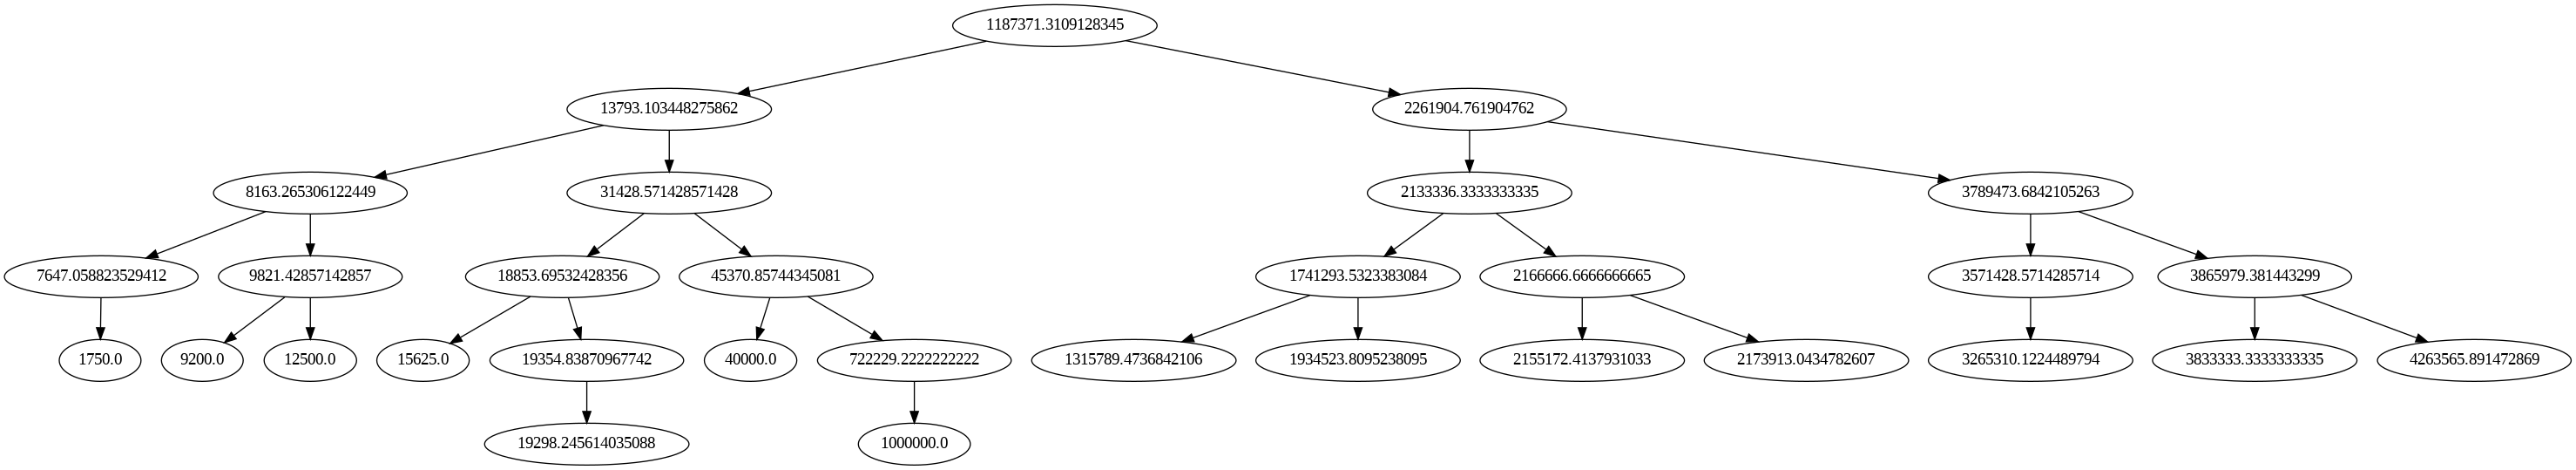

In [ ]:
# Agregar nuevos datos

new_data = Data(
    title = input(" Ingrese el título "),
    department=input(" Ingrese el departamento "),
    city=input(" Ingrese la ciudad "),
    property_type=input(" Ingrese el tipo de propiedad "),
    latitude=float(input(" Ingrese la latitud ")),
    longitude=float(input(" Ingrese la longitud ")),
    surface_total=float(input(" Ingrese la superficie total ")),
    surface_covered=float(input(" Ingrese la superficie cubierta ")),
    bedrooms=int(input(" Ingrese el número de habitaciones ")),
    bathrooms=int(input(" Ingrese el número de baños ")),
    operation_type=input(" Ingrese el ripo de operación "),
    price=int(input(" Ingrese el precio "))
  )

met = new_data.price/new_data.surface_total
print(met)
arbol.add(met, new_data)


dot = Digraph() # dot tiene la función de generar el diagrama

def dibujarr(node, dot): # dibujarr es la función que utilizamos para agregar tanto los nodos como las aristas/conexiones en el árbol
    if node is not None:
        dot.node(str(node.key), label=str(node.key)) # aquí se crea el nodo
        if node.left is not None:
            dot.edge(str(node.key), str(node.left.key)) # se crea arista entre nodo y nodo hijo izquierdo
            dot = dibujarr(node.left, dot) # llamado recursivo de la función
        if node.right is not None:
            dot.edge(str(node.key), str(node.right.key)) # se crea arista entre nodo y nodo hijo derecho
            dot = dibujarr(node.right, dot) # llamado recursivo de la función
    return dot # se retorna el gráfico generado

dot = dibujarr(arbol.root, dot) # se llama a la función generadora y se grafica todo el arbol

dot.render('arbol_avl', format='png') # guardamos el gráfico generado en un archivo PNG

from IPython.display import Image
Image(filename='arbol_avl.png') # muestra la imagen generada

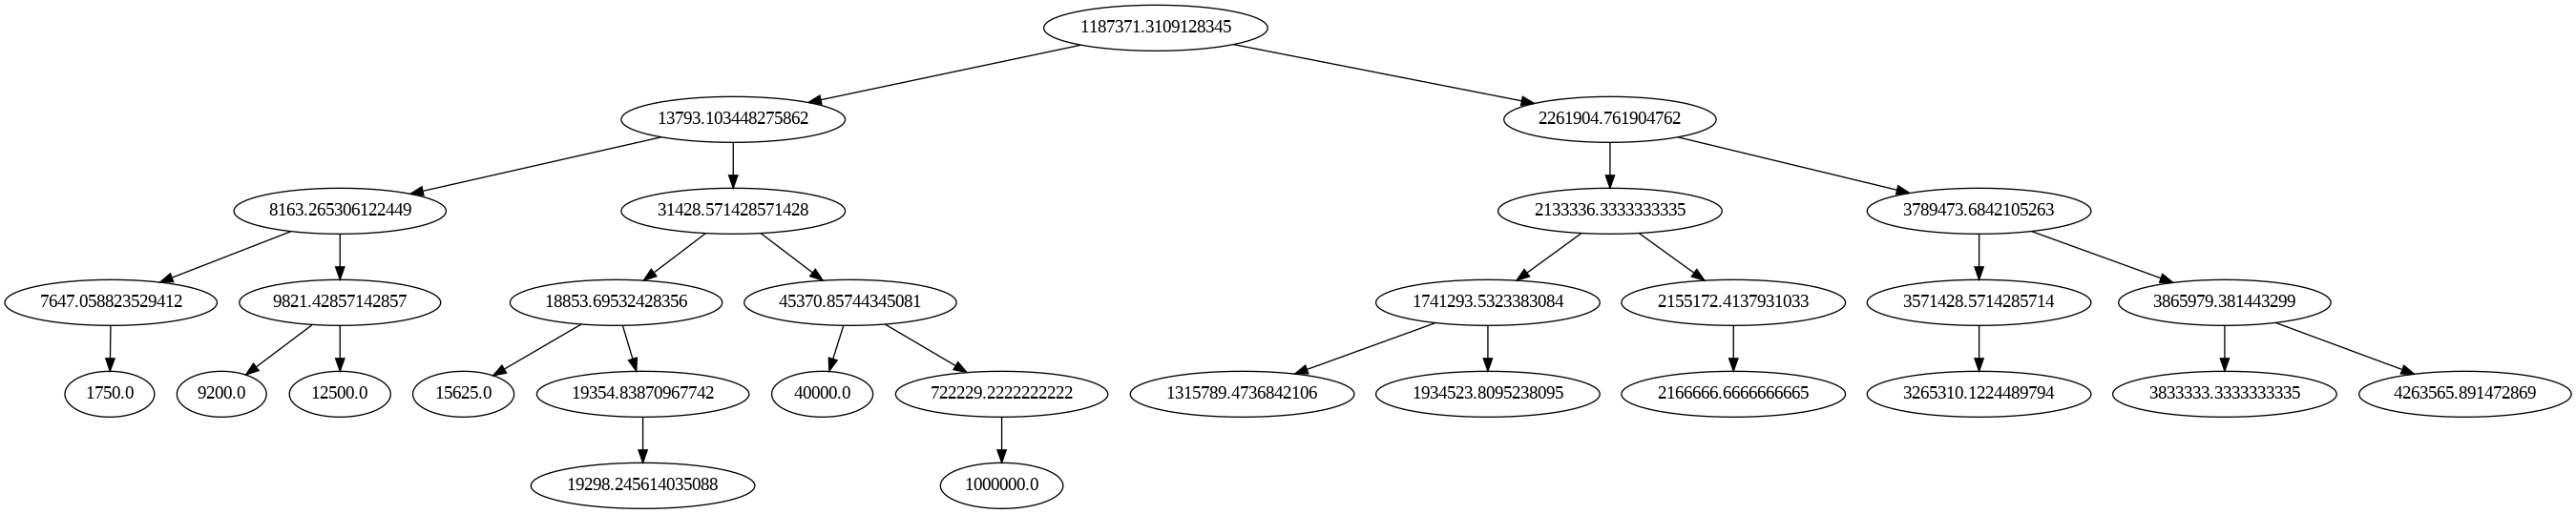

In [ ]:
# Eliminar

arbol.remove(4433333.333333333)

dot = Digraph() # dot tiene la función de generar el diagrama

def dibujarr(node, dot): # dibujarr es la función que utilizamos para agregar tanto los nodos como las aristas/conexiones en el árbol
    if node is not None:
        dot.node(str(node.key), label=str(node.key)) # aquí se crea el nodo
        if node.left is not None:
            dot.edge(str(node.key), str(node.left.key)) # se crea arista entre nodo y nodo hijo izquierdo
            dot = dibujarr(node.left, dot) # llamado recursivo de la función
        if node.right is not None:
            dot.edge(str(node.key), str(node.right.key)) # se crea arista entre nodo y nodo hijo derecho
            dot = dibujarr(node.right, dot) # llamado recursivo de la función
    return dot # se retorna el gráfico generado

dot = dibujarr(arbol.root, dot) # se llama a la función generadora y se grafica todo el arbol

dot.render('arbol_avl', format='png') # guardamos el gráfico generado en un archivo PNG

from IPython.display import Image
Image(filename='arbol_avl.png') # muestra la imagen generada


# Buscar nodos

In [ ]:
clave = float(input("Inserte la clave a buscar"))

dato = arbol.search(clave) #busca el nodo por la metrica
m = folium.Map(location=[4.570868, -74.297333],zoom_start=6, tiles = "Stamen Terrain") #guarda la longitud y latitud del registro

if dato is not None:
  tooltip = dato.data.title
  folium.Marker([dato.data.latitude,dato.data.longitude], popup= f"Precio:  {dato.data.price} \n Clave:   {dato.key}", tooltip=tooltip).add_to(m)


print(f"Nivel: {arbol.height(arbol.root) - arbol.height(arbol.search(clave)) - 1 }")# Nivel del nodo
print(f"Padre: {arbol.bp(clave)}")
print(f"Abuelo: {arbol.bp(arbol.bp(clave))}")

papa = arbol.bp(clave)#Padre
abuelo = arbol.bp(arbol.bp(clave))#abuelo

print(f"Tío: {arbol.bt(clave, abuelo, papa)}") #Tio
print(f"Factor de balanceo: {arbol.balance(arbol.search(clave))}") #Factor de equilibrio


op_nodos = [] # Agrega los nodos a un vector par amarcarlos en el mapa.
op_nodos.append(arbol.search(papa))
op_nodos.append(arbol.search(abuelo))
op_nodos.append(arbol.search(arbol.bt(clave, abuelo, papa)))

noditos = op_nodos

for i  in range(len(noditos)):
  labels = ["Padre", "Abuelo", "Tío"] # las etiquetas para nodos parientes
  tooltip = noditos[i].data.title # nombre del marcador
  folium.Marker([noditos[i].data.latitude,noditos[i].data.longitude], popup= f"Precio:  {noditos[i].data.price} \n Clave:   {noditos[i].key}  \n Parentesco:   {labels[i]}", tooltip=tooltip).add_to(m)

m


In [ ]:
#Con condiciones:
tope = 3
cond = {}


while len(cond) < tope: # Se ingresan las condiciones en un diccionario.
    print("Ingrese la condición:")
    attr = input("Nombre del dato")
    operacion = input("comparador")
    valor = input("valor")
    cond[attr] = (operacion, valor)
    seguir = input("si desea seguir, escriba s")
    if seguir != 's':
        break

print("--------- \n \n")

filtrados = arbol.en_cond(arbol.root,cond) #los que estan en el arbol y cumplen con la condición
#muestra los que cumplen con la condicion dada
for i in range(len(filtrados)):
  print(f"Clave: {filtrados[i].key} Precio:{filtrados[i].data.price} \nTítulo: {filtrados[i].data.title} \nCiudad: {filtrados[i].data.city}\nDepartamento: {filtrados[i].data.department}")
  print(f"Tipo de propiedad: {filtrados[i].data.property_type}\nLatitud: {filtrados[i].data.latitude} Longitud: {filtrados[i].data.longitude}\nSuperficie:\nTotal:{filtrados[i].data.surface_total} Cubierta: Total:{filtrados[i].data.surface_total}")
  print(f"Habitaciones: {filtrados[i].data.bedrooms} Baños: {filtrados[i].data.bathrooms} \nTipo de operación: {filtrados[i].data.operation_type}\n ------------ \n")

import folium
m = folium.Map(location=[4.570868, -74.297333],zoom_start=6, tiles = "Stamen Terrain") #Genera el mapa

#latidud y longitud de los nodos que cumplen con la condicion
for i  in range(len(filtrados)):
  "yipi"
  tooltip = filtrados[i].data.title
  folium.Marker([filtrados[i].data.latitude,filtrados[i].data.longitude], popup= f"Precio:  {filtrados[i].data.price} \n Clave:   {filtrados[i].key}", tooltip=tooltip).add_to(m)

noditos = menu(arbol)
for i  in range(len(noditos)):
  labels = ["Padre", "Abuelo", "Tío"] # las etiquetas para nodos parientes
  tooltip = noditos[i].data.title # nombre del marcador
  folium.Marker([noditos[i].data.latitude,noditos[i].data.longitude], popup= f"Precio:  {noditos[i].data.price} \n Clave:   {noditos[i].key}  \n Parentesco:   {labels[i]}", tooltip=tooltip).add_to(m)

m

Ingrese la condición:
Nombre del datocity
comparador==
valorBarranquilla
si desea seguir, escriba sn
--------- 
 

Clave: 18853.69532428356 Precio:25000000.0 
Título: Casa En Arriendo/venta En Barranquilla Caujaral Cod. AREI-16605 
Ciudad: Barranquilla
Departamento: Atlántico
Tipo de propiedad: Casa
Latitud: 11.005 Longitud: -74.815
Superficie:
Total:1326.0 Cubierta: Total:1326.0
Habitaciones: 4.0 Baños: 6.0 
Tipo de operación: Arriendo
 ------------ 

Clave: 19354.83870967742 Precio:1200000.0 
Título: Apartamento En Arriendo En Barranquilla Betania Cod. AADN758180 
Ciudad: Barranquilla
Departamento: Atlántico
Tipo de propiedad: Apartamento
Latitud: 10.986 Longitud: -74.812
Superficie:
Total:62.0 Cubierta: Total:62.0
Habitaciones: 2.0 Baños: 2.0 
Tipo de operación: Arriendo
 ------------ 

Clave: 2133336.3333333335 Precio:320000000.0 
Título: Casa En Arriendo/venta En Barranquilla Bellavista Cod. VFNC10498 
Ciudad: Barranquilla
Departamento: Atlántico
Tipo de propiedad: Casa
Latitud: 1

In [ ]:
def menu(arbol): #operaciones
  print("¿Qué nodo desea escoger para realizar las operaciones\n")
  clave = float(input("Por favor, ingrese la clave del nodo:"))

  print(f"Nivel: {arbol.height(arbol.root) - arbol.height(arbol.search(clave)) - 1 }") #muestra el nivel
  print(f"Padre: {arbol.bp(clave)}") #muestra el padre
  print(f"Abuelo: {arbol.bp(arbol.bp(clave))}") #muestra el abuelo

  papa = arbol.bp(clave)#papá
  abuelo = arbol.bp(arbol.bp(clave))#abuelo

  print(f"Tío: {arbol.bt(clave, abuelo, papa)}")#muestra el tío
  print(f"Factor de balanceo: {arbol.balance(arbol.search(clave))}")#muesrtra el factor de equilibrio


  op_nodos = []
  op_nodos.append(arbol.search(papa))
  op_nodos.append(arbol.search(abuelo))
  op_nodos.append(arbol.search(arbol.bt(clave, abuelo, papa)))
  return(op_nodos) # NODOS PADRE, ABYUELO Y TIO



# Recorrido por nivel

In [ ]:
def x_nivel(root):
    if not root:
        return []

    def height(node):
        if not node:
            return 0
        return max(height(node.left), height(node.right)) + 1

    def imprimir_nivel(node, level, result):
        if not node:
            return
        if level == 1:
            result.append(node.key) # imprime nodo
        elif level > 1:
            imprimir_nivel(node.left, level - 1, result) # Coge pa la izq hasta que level es 1.
            imprimir_nivel(node.right, level - 1, result) # Coge pa la derecha hasta q level es 1.

    orden = [] # orden
    arbol_altura = height(root) # altura del arbol

    for level in range(1, arbol_altura + 1):
        imprimir_nivel(root, level, orden)

    return orden

In [ ]:
x_nivel(arbol.root)

# Gráficas

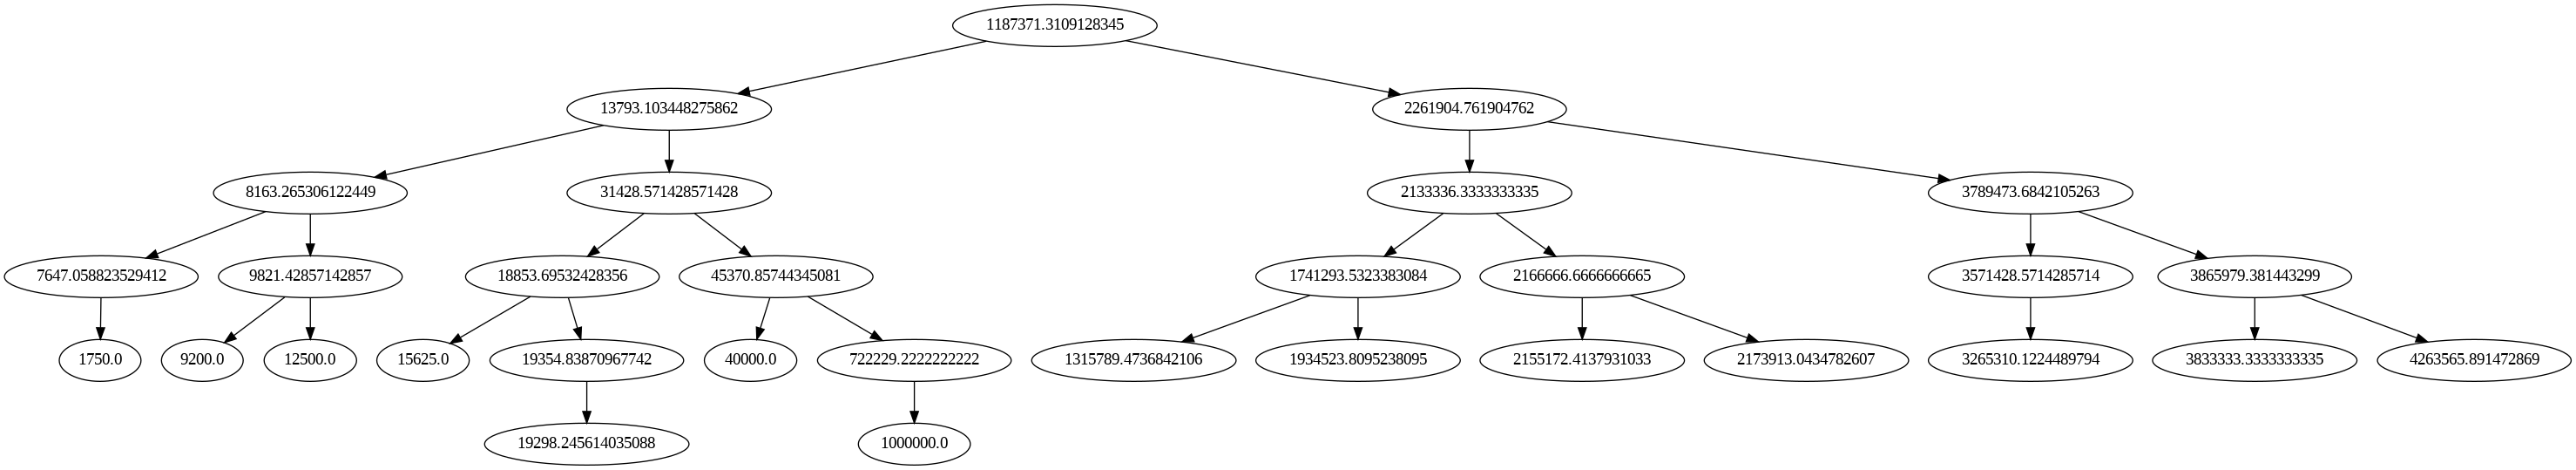

In [ ]:
# Visualización del Árbol AVL
from graphviz import Digraph

dot = Digraph() # dot tiene la función de generar el diagrama

def dibujarr(node, dot): # dibujarr es la función que utilizamos para agregar tanto los nodos como las aristas/conexiones en el árbol
    if node is not None:
        dot.node(str(node.key), label=str(node.key)) # aquí se crea el nodo
        if node.left is not None:
            dot.edge(str(node.key), str(node.left.key)) # se crea arista entre nodo y nodo hijo izquierdo
            dot = dibujarr(node.left, dot) # llamado recursivo de la función
        if node.right is not None:
            dot.edge(str(node.key), str(node.right.key)) # se crea arista entre nodo y nodo hijo derecho
            dot = dibujarr(node.right, dot) # llamado recursivo de la función
    return dot # se retorna el gráfico generado

dot = dibujarr(arbol.root, dot) # se llama a la función generadora y se grafica todo el arbol

dot.render('arbol_avl', format='png') # guardamos el gráfico generado en un archivo PNG

from IPython.display import Image
Image(filename='arbol_avl.png') # muestra la imagen generada
